# Определение популярности компьютерной игры

## Введение

В этом исследовании мы рассмотрим факторы, определяющие популярность игры.

**Цель: рекомендации по фокусу на определенный продукт для отдела продаж, составление портрета типичного клиента для маркетологов**


В нашем распоряжении данные онлайн магазина, содержащие информацию:
 - о продажах игр в разрезе регионов Северная Америка, Япония, Европа и "иные" (в миллионах копий);
 - об оценках пользователей (от 1 до 10 баллов) и экспертов (до 100 баллов),
 - о жанрах и платформах (например, Xbox или PlayStation),
 - о возрастных рейтингах игр (Е - "для всех", Е10+ - "для всех, включая детей с 10 лет", Т - "для подростков", М - "для взрослых")
 
 
В главе 2 изучим датасет на предмет наличия проблем, пропусков и очевидных корреляций, в главе 3 приведем данные в порядок, скорректируем названия столбцов, добавим новые для упрощения обработки (общая сумма продаж по всем регионам), обработаем пропуски при целесообразности.
В главе 4 изучим общие и локальные тренды, выявим наиболее популярные платформы в целом и в разрезе регионов, выявим предпочтения в жанрах игр у пользователей разных регионов, проверим, есть ли зависимость между оценками пользователей/ критиков и кассовостью игры, а также найдем игру, которая заслужила наивысшие баллы как у критиков, так и у пользователей. Также отдельно попробуем обрисовать портрет пользователя каждого из трех регионов (Северная Америка, Европа и Япония) с точки зрения жанровых предпочтений и возможного возрастного состава.
В главе 5 проверим две гипотезы о соответствии пользовательских рейтингов двух платформ и двух жанров.

## Изучение датасета

Проект начинается с изучения имеющихся данных.
Импортируем все необходимые для дальнейшей работы библиотеки и ознакомимся с файлом.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings

In [2]:
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
except:
    print("Проверьте правильность пути к датасету")

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [6]:
df.corr()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
Year_of_Release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411
NA_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755
EU_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752
JP_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593
Other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000


Предварительные данные по корреляции показывают:
 - продажи в Северной Америке и в Европе находятся в сильной прямой зависимости друг от друга, а вот Япония и другие страны демонстрируют менее очевидную зависимость;
 - рейтинг критиков предварительно оказывет очень слабое влияние на продажи.

Для дальнейшего углубленного анализа скорректируем файл.

## Предобработка

Подготовим данные:
 - Заменим названия столбцов (приведем к нижнему регистру);
 - Удалим строки с пропусками в столбцах Year_of_Release и Genre (менее 2% данных датафрейма);
 - Преобразуем данные в нужные типы (столбцы Year_of_Release, User_Score);
 - Создадим отдельный столбец с доп.признаком - имеется ли пользовательский рейтинг или нет;
 - Скорректируем данные в User_Score, вынесем отдельно новые релизы в отдельный столбец с признаком.
 - Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
 
 Обработка столбцов с пропусками на предмет их заполнения Critic_Score, User_Score и Rating нецелесообразно ввиду целевого характера данных столбцов для анализа (заполнение средним или случайным числом может исказить данные), т.к. это означает потерю качества данных, далее анализ будем строить на сравнении этих субмассивов.

In [7]:
df.columns = df.columns.map(lambda x: x.lower())

In [8]:
df = df.dropna(subset=['year_of_release','genre'])

In [9]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данном столбце кроме пропусков имеется аббревиатура 'tbd', в игровой индустрии данным тремином обозначено словосочетание "to be determined", т.е. "будет определено позднее", такой статус присваивается либо новым играм, которые пользователи еще не успели оценить, либо играм, у которых очень небольшое количество оценок, т.е. они непопулярны или их пользователи не участвуют в опросах.

Вынесем данный признак в отдельный столбец, а в столбце с пользовательским рейтингом заменим данное значение на nan (пропуск). Заполнение медианным значением по какой бы то ни было группировке не целесообразно, т.к. это исказит данные и помешает проанализировать зависимость выручки от пользовательского рейтинга. Заполнение нулевыми значениями также исказит данные, т.к. часть игр потенциально может быть хитами после релиза.

In [11]:
df['user_score_cat'] = df['user_score'].where(df['user_score'] == 'tbd', 'has_score')

In [12]:
df['user_score'] = df['user_score'].where(df['user_score'] != 'tbd', float('nan'))
df['user_score'] = df['user_score'].astype(float)

In [13]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [14]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_cat,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,has_score,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,has_score,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,has_score,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,has_score,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,has_score,31.38


Проверим, являются ли пропуски в значениях рейтингов признаком, свойственным старым играм.

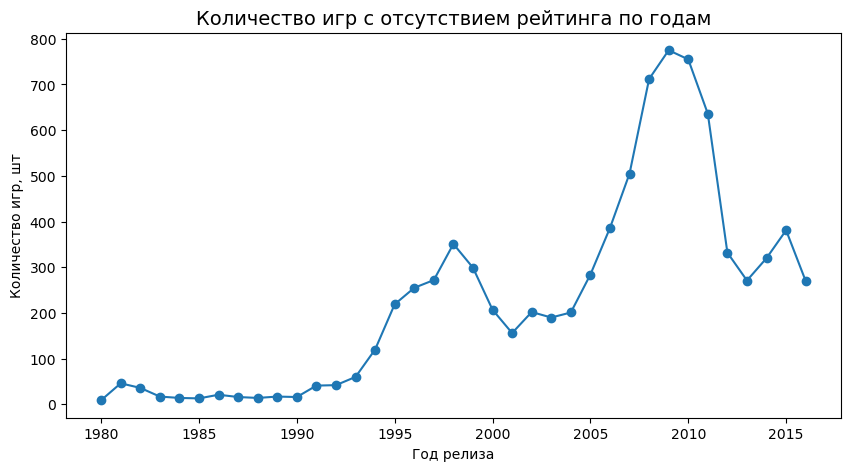

In [15]:
x = df.loc[(df['critic_score'].isna())]
g = x.groupby('year_of_release')['name'].count().plot(style='o-', figsize = (10,5))
g.axes.set_title("Количество игр с отсутствием рейтинга по годам", fontsize=14)
g.set_xlabel("Год релиза", fontsize=10)
g.set_ylabel("Количество игр, шт", fontsize=10)
plt.show()

Предположение не подтвердилось, количество нерейтингованных игр за последние 10 лет только увеличились, что связано с увеличением количества релизов игр по сравнению с 1980-ми. Тренд сравним позднее с общим трендом.

Проверим столбец с возрастным рейтингом.

In [16]:
print(df['rating'].unique())
print(df['rating'].isna().sum(),' ',round(df['rating'].isna().sum()/len(df['rating'])*100,2),'%')

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
6676   40.6 %


Рейтинги просвоены организацией ESRB, она ранжирует возрастную категорию игр для Северной Америки (Канада, США). Проверим наличие рейтингов у игр, которые не продавались в Северной Америке (базовое предположение:нет реализации в Америке - не будет и рейтинга)

In [17]:
print(df.query('na_sales == 0')['rating'].unique())
print(df.query('na_sales == 0')['rating'].isna().sum())

[nan 'E' 'T' 'M' 'E10+' 'RP' 'K-A']
3688


Только чуть больше половины пропусков можно объяснить тем, что организация работает с рейтингами в первую очередь для Северной Америки, в датасете есть игры, не продававшиеся в Америке, но при этом без рейтинга. Расширим логику и последовательно проверим,  есть ли регион, в котором продавались свои уникальные игры, и у них не было рейтинга.

In [18]:
print(df.query('na_sales != 0 & eu_sales == 0 & other_sales ==0 & jp_sales == 0')['rating'].unique())
print(df.query('na_sales != 0 & eu_sales == 0 & other_sales ==0 & jp_sales == 0')['rating'].isna().sum())

['E' 'T' nan 'E10+' 'M' 'EC']
215


In [19]:
print(df.query('na_sales == 0 & eu_sales != 0 & other_sales ==0 & jp_sales == 0')['rating'].unique())
print(df.query('na_sales == 0 & eu_sales != 0 & other_sales ==0 & jp_sales == 0')['rating'].isna().sum())

['E' nan 'M' 'E10+' 'T' 'K-A']
232


In [20]:
print(df.query('na_sales == 0 & eu_sales == 0 & other_sales !=0 & jp_sales == 0')['rating'].unique())
print(df.query('na_sales == 0 & eu_sales == 0 & other_sales !=0 & jp_sales == 0')['rating'].isna().sum())

['E']
0


In [21]:
print(df.query('na_sales == 0 & eu_sales == 0 & other_sales ==0 & jp_sales != 0')['rating'].unique())
print(df.query('na_sales == 0 & eu_sales == 0 & other_sales ==0 & jp_sales != 0')['rating'].isna().sum())

[nan 'T' 'M' 'E' 'E10+']
3002


In [22]:
print(df.query('na_sales == 0 & eu_sales == 0 & other_sales ==0 & jp_sales == 0')['rating'].unique())
print(df.query('na_sales == 0 & eu_sales == 0 & other_sales ==0 & jp_sales == 0')['rating'].isna().sum())

[nan]
2


Нашлись две игры, которые не набрали миллиона продаж копий ни в одном из регионов. Проигнорируем их, они не повлияют на исследование ввиду единичности.

In [23]:
print(df.query('jp_sales == 0')['rating'].unique())
print(df.query('jp_sales == 0')['rating'].isna().sum())

['E10+' 'T' nan 'M' 'E' 'K-A' 'AO' 'EC' 'RP']
2720


Итого больше всего пропусков в строках по играм, которые продавались в каждом регионе, включая Америку, где причину отсутсвия пропусков предстоит выяснить, и по строкам уникальных продаж Японии, в отношении которых, видимо, не использовался рейтинг от ESRB, т.к. они были полностью реализованы только на внутреннем рынке.
Т.к. не удалось на данном этапе установить причину пропусков, заполним nan значением "no_rating" для отражения таких пропусков при дальнейшем анализе. 

In [24]:
df['rating'] = df['rating'].fillna('no_rating')
df['rating'].isna().sum()

0

In [25]:
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  user_score_cat   16444 non-null  object 
 12  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.8+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Inst

## Анализ данных.

Изучим на основании очищенных данных факторы, определяющие успех игры.
Для начала выясним, сколько игр выпускалось за прошлые годы и текущий тренд.

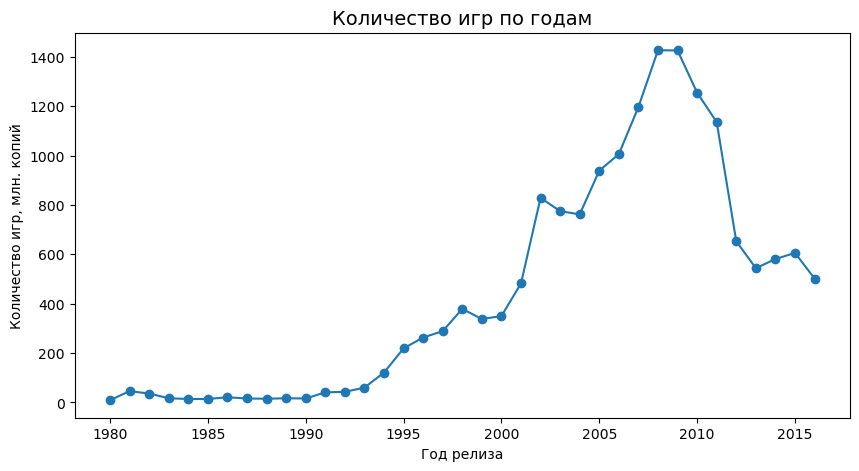

In [26]:
g = df.groupby('year_of_release')['name'].count().plot(style='o-', figsize = (10,5))
g.axes.set_title("Количество игр по годам", fontsize=14)
g.set_xlabel("Год релиза", fontsize=10)
g.set_ylabel("Количество игр, млн. копий", fontsize=10)
plt.show()

До 2000 года количество продаж игр было достаточно скромным, после чего пошел взрывной рост.
На текущий момент тренд по количеству игр нисходящий, после 2008 года количество новых релизов каждый год падает.
Это совпало с мировым финансовым кризисом, который также затронул и игровую отрасль, сократив рабочие места и уменьшив число покупателей консолей и компьютеров.
Также после него активизировался отток пользователей на мобильные платформы и социальные сети, что также не способствовало вложениям разработчиков в новые игры.

Посмотрим динамику в разрезе игровых платформ. Отберем топ-15 платформ по продажам.

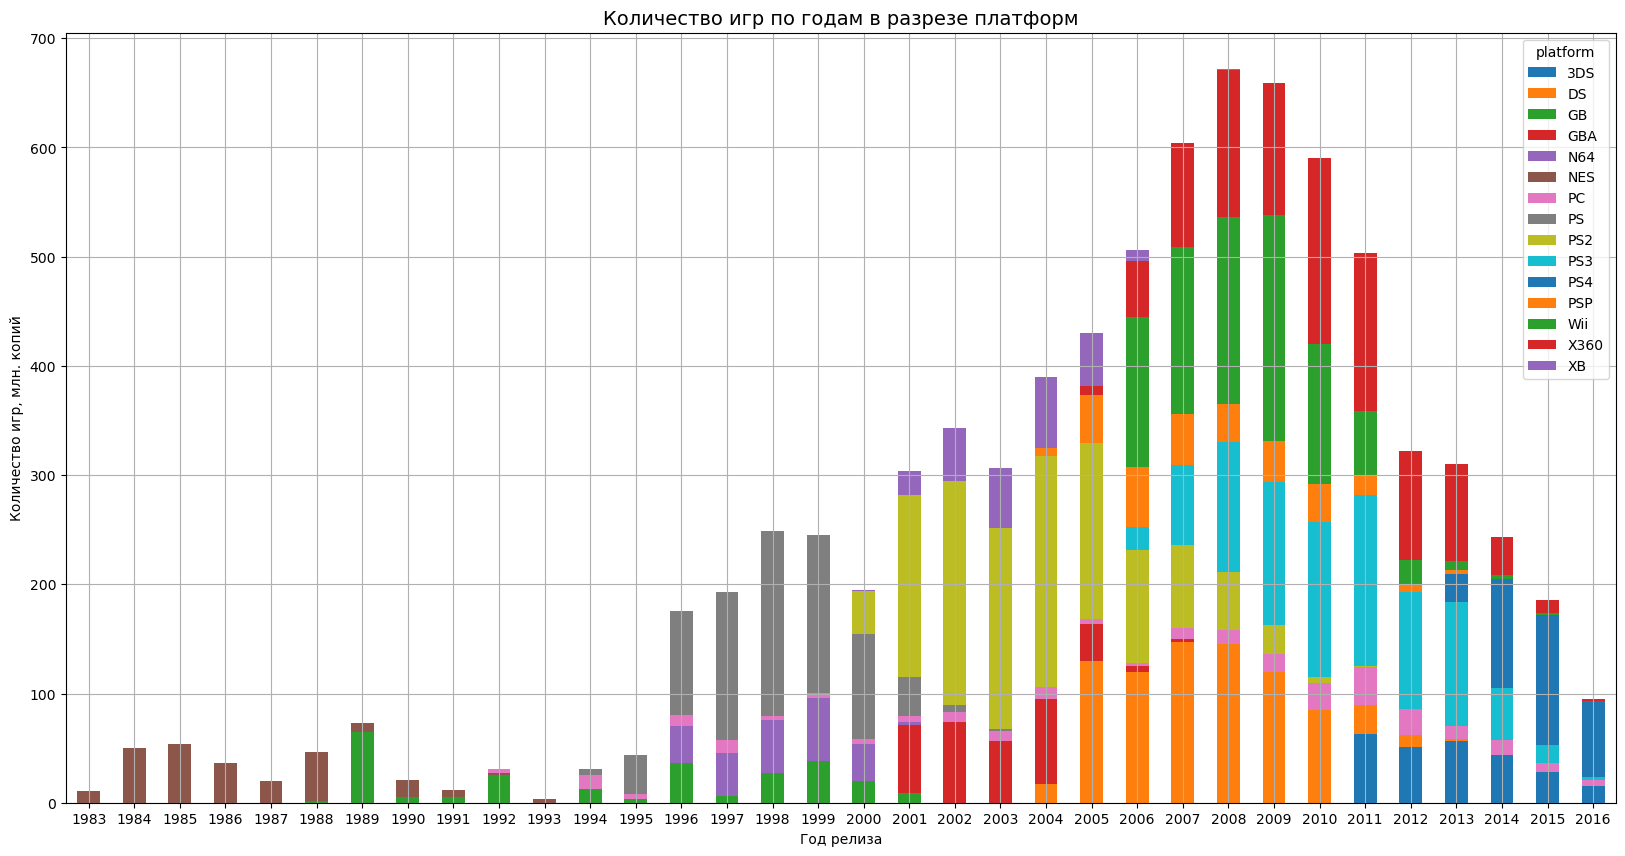

In [27]:
top = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(15)
top_df = df[df.platform.isin(top.index)]
g = top_df.pivot_table(
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales',
    aggfunc='sum').fillna(0).plot.bar(rot=0, grid=True,figsize = (20,10), stacked = True)
g.axes.set_title("Количество игр по годам в разрезе платформ", fontsize=14)
g.set_xlabel("Год релиза", fontsize=10)
g.set_ylabel("Количество игр, млн. копий", fontsize=10)
plt.show()

Как видно из графика выше, имеет место замещение платформами нового поколения старых, средний срок жизни - от 5 до 10 лет. Дольше всех, на 2016 год, держится Х360 - 12 лет.
Из дополнительных интересных наблюдений следует отметить:
 - на заре развития игровой индустрии главенствовал Нинтендо, которого в 1989 году сменил GameBoy;
 - история платформ PS началась в 1994 году и вскоре они стали одними из основных платформ для игр, фактически конкурируя сами с собой;
 - доля продаж на PC стабильно низкая, что может быть связано с тем, что далеко не все имеющие компьютер люди, имеют возможность приобрести и запустить интересующую их игру (т.е. техника не подходит под все увеличивающиеся требования), а также с тем, что игры на PC традиционно значительно дешевле игр на специализированных платформах, а также с тем, что на персональные компьютеры меньше релизов в принципе.
 - максимальную популярность платформа набирает примерно на 3 год существования и пик расцвета длится у самых удачных платформ (семейство PS) 3-4 года, у прочих- 2-3 года.

Для прогноза на будущий год данные за 30 лет не требуются, более того, ввиду того, что на данном промежутке произошло фактически становление индустрии, исторически отдаленные данные внесут некорректные тренды.

Наиболее актуальными данными, которые в т.ч. отражают возможные колебания рынка, обычно являются данные за предшествующие 3 года. Следует отметить, что в нашем случае имеется устойчивый нисходящий тренд, разница между продажами 2014 и 2016 года составляет почти 100 млн. копий, в связи с чем для прогнозирования именно размера продаж целесообразно взять только 2016 год. Ограничим выборку именно этими данными. Также сосредоточимся на анализе топ-5 платформ.

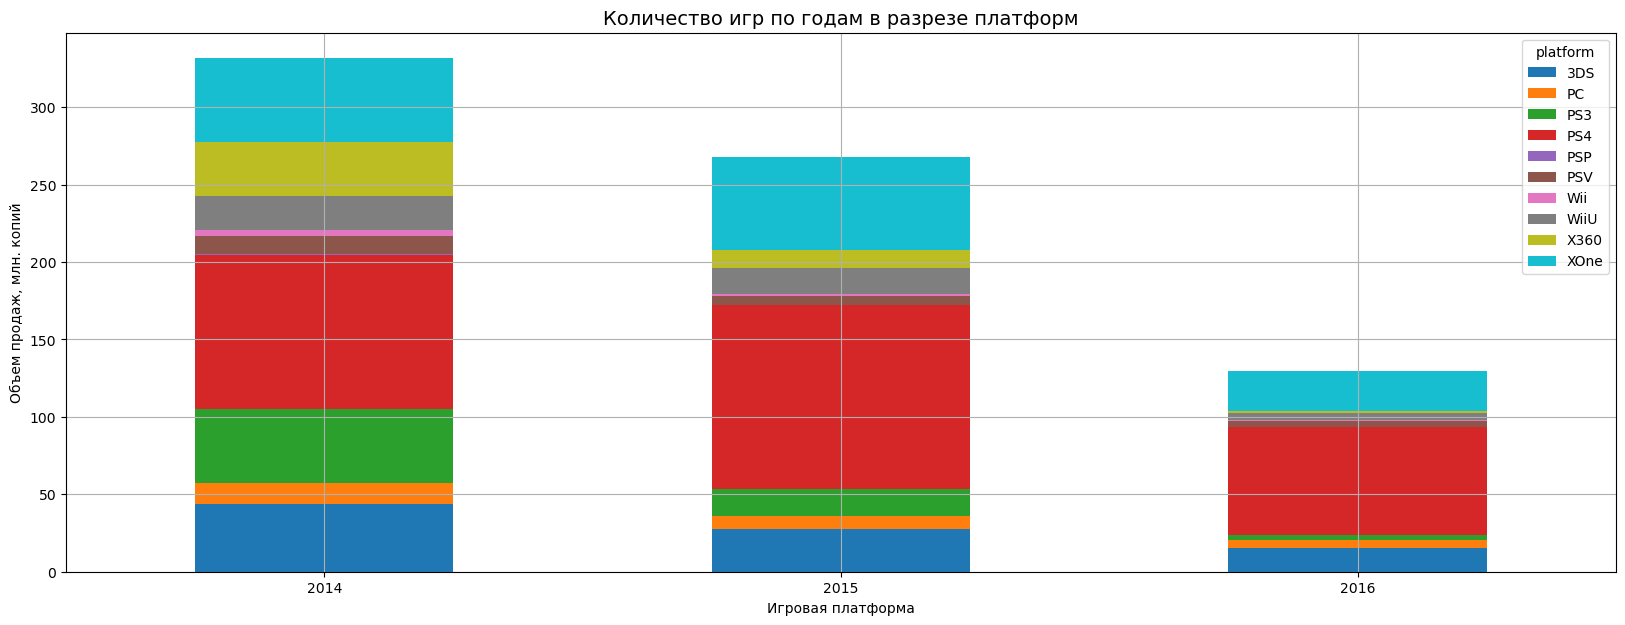

In [28]:
act_df = df[df.year_of_release>=2014]
g = act_df.pivot_table(
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales',
    aggfunc='sum').fillna(0).plot.bar(rot=0, grid=True,figsize = (20,7),stacked = True)
g.axes.set_title("Количество игр по годам в разрезе платформ", fontsize=14)
g.set_xlabel("Игровая платформа", fontsize=10)
g.set_ylabel("Объем продаж, млн. копий", fontsize=10)
plt.show()

Итак, в 2015 - 2016 году большая часть игр выходила на PS4. Она существует уже третий год, т.е как раз набирает максимальную популярность у пользователей, вытесняя с рынка новых кассовых релизов своих конкурентов по платформам. Хорошую конкуренцию ей составляет XOne, хотя объем продаж игр на нее почти в 2 раза меньше лидера, замыкает тройку 3DS от Nintendo, которая стоит особняком ввиду ее относительной мобильности. Релизы игр на PS3 к 2016 году сошли практически на 0, хотя еще в 2014 году количество игр, выпускаемых на эту платформу, было сопоставимо с количеством игр на XOne, к 2016 году разработчики почти полностью перешли на новое поколение приставок семейства PS.

Изучим разброс данных в выборке в разрезе по платформам.

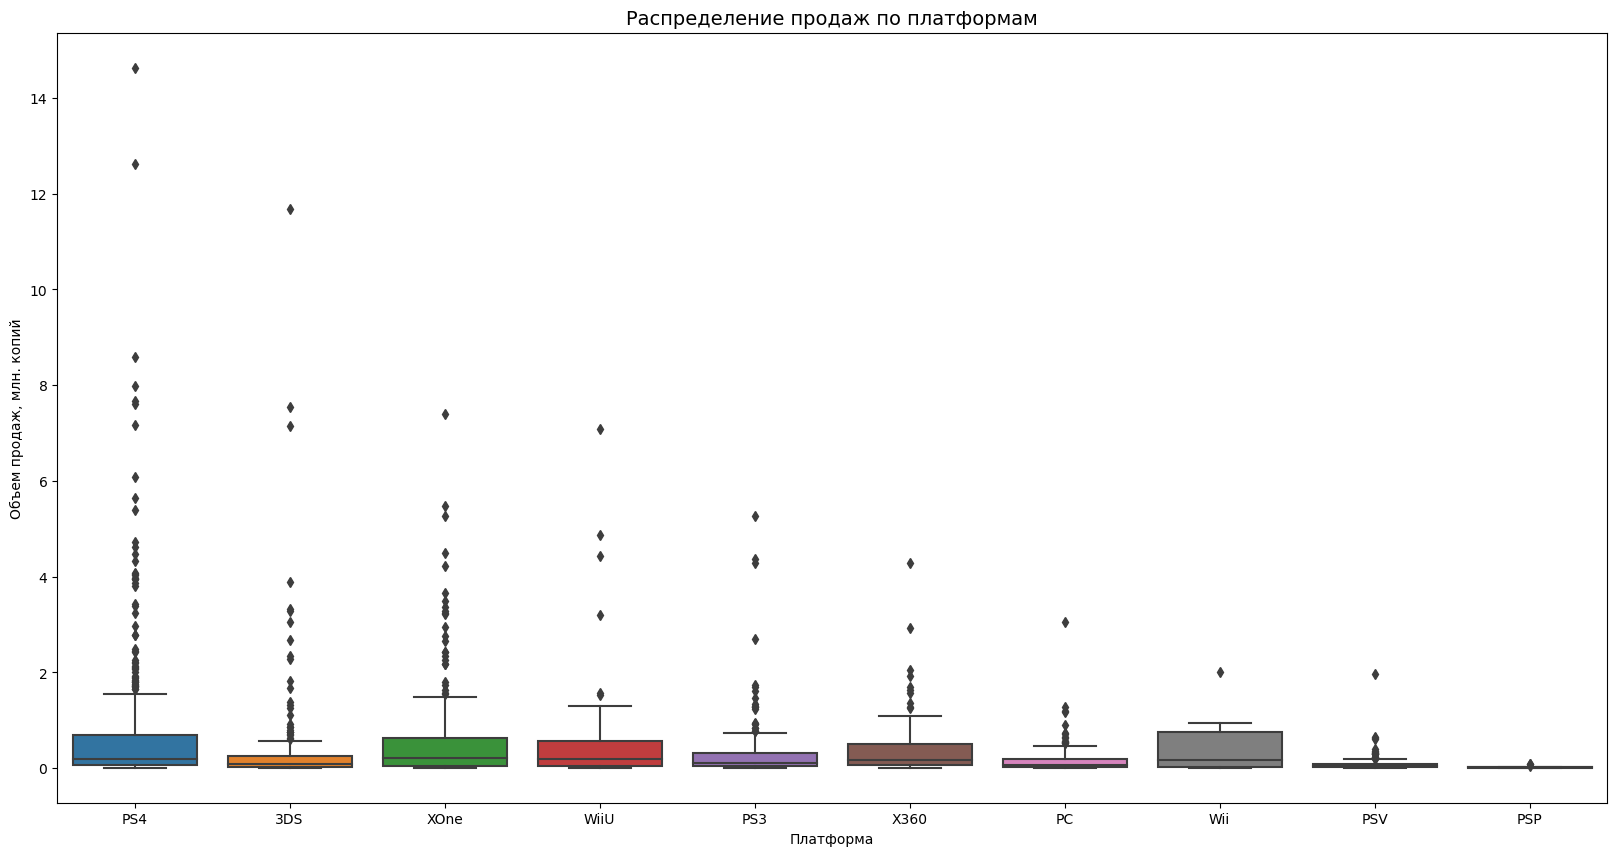

In [29]:
plt.figure(figsize=(20,10))
boxplot = sns.boxplot(data=act_df, x='platform', y='total_sales')
boxplot.axes.set_title("Распределение продаж по платформам", fontsize=14)
boxplot.axes.set_ylabel("Объем продаж, млн. копий", fontsize=10)
boxplot.axes.set_xlabel("Платформа", fontsize=10)
plt.show()

У самой популярной платформы и самый большой разброс значений: медиана продаж не превышает 0.25 млн. копий, при этом имеется значительное число аномалий свыше 2 млн. проданных копий. Именно эти аномалии показывают нам самые популярные игры 2014-2016 года. Посмотрим список таких игр.

In [30]:
act_df.query('total_sales >=2')['name'].unique()

array(['Call of Duty: Black Ops 3', 'Grand Theft Auto V',
       'Pokemon Omega Ruby/Pokemon Alpha Sapphire', 'FIFA 16',
       'Star Wars Battlefront (2015)', 'Call of Duty: Advanced Warfare',
       'FIFA 17', 'Super Smash Bros. for Wii U and 3DS', 'Fallout 4',
       'Pokemon Sun/Moon', 'Mario Kart 8', 'FIFA 15', 'Destiny',
       "Uncharted 4: A Thief's End", 'Minecraft', 'The Last of Us',
       'Uncharted: The Nathan Drake Collection', 'Halo 5: Guardians',
       'Call of Duty: Infinite Warfare', 'Splatoon', 'Battlefield 1',
       'Watch Dogs', 'Far Cry 4', 'The Witcher 3: Wild Hunt',
       "Assassin's Creed: Unity", 'Batman: Arkham Knight',
       'Monster Hunter 4 Ultimate', 'NBA 2K16',
       "Tom Clancy's The Division",
       'Metal Gear Solid V: The Phantom Pain',
       "Assassin's Creed Syndicate", 'Monster Hunter X',
       'Yokai Watch 2 Ganso/Honke', 'Gears of War: Ultimate Edition',
       'Madden NFL 16', 'Halo: The Master Chief Collection',
       'Super Mario Mak

Следует отметить, что большинство игр являтся продолжениями популярных франшиз (Call of Duty, The Witcher, Assassin's Creed, Metal Gear,FIFA и пр.), поэтому их исключительные продажи вполне объяснимы. Рассмотрим продажи чуть крупнее.

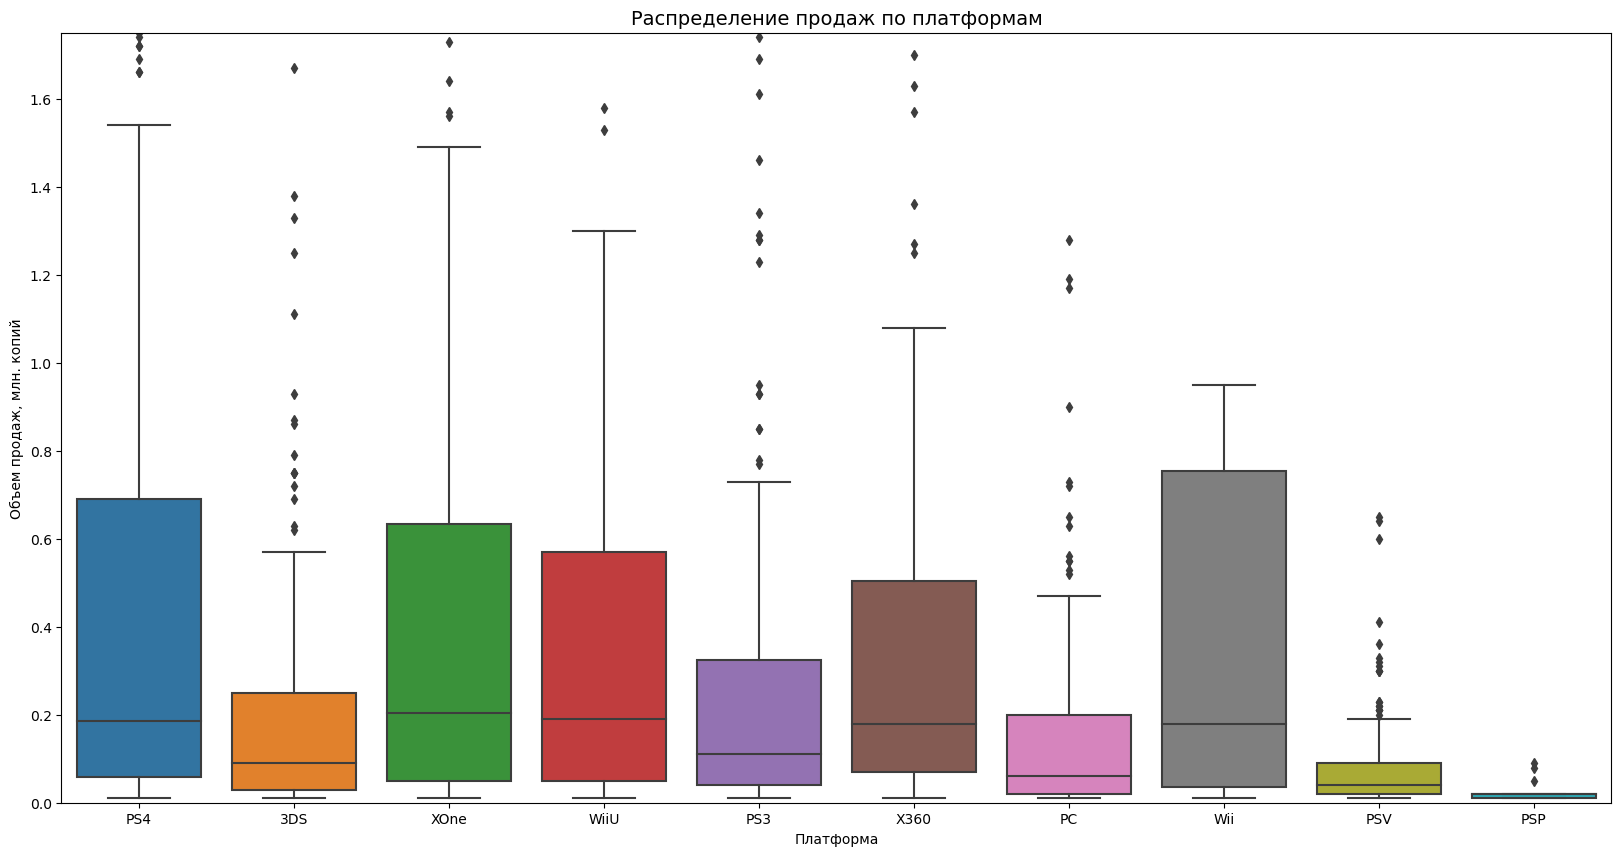

In [31]:
plt.figure(figsize=(20,10))
boxplot = sns.boxplot(data=act_df, x='platform', y='total_sales')
boxplot.set(ylim=(0, 1.75))
boxplot.axes.set_title("Распределение продаж по платформам", fontsize=14)
boxplot.axes.set_ylabel("Объем продаж, млн. копий", fontsize=10)
boxplot.axes.set_xlabel("Платформа", fontsize=10)
plt.show()

Медиана продаж у 5 из 10 платформ (включая самые популярные PS4 и XOne) находится на одном уровне, ок.0.2 млн. проданных копий игры. Медианные продажи остальных в 2 и более раза ниже. Это значит, что исключая "аномально" популярные игры, именно эти 5 платформ дают стабильную выручку.

Изучим продажи внутри самой популярной платформы и проверим, влияют ли оценки пользователей и критиков на популярность игр.

/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


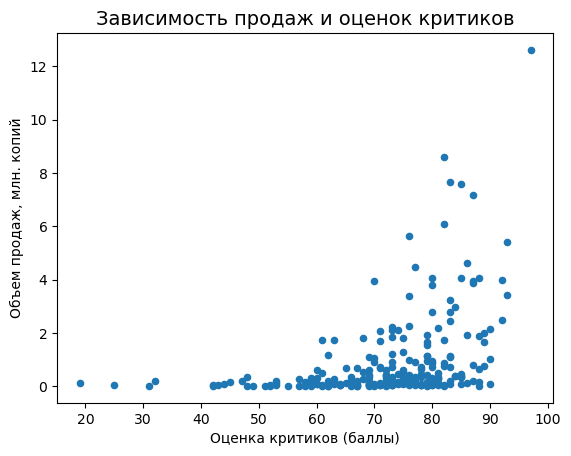

Коэффициент корреляции:0.4027


In [32]:
ps4=act_df.query('platform=="PS4"')
g = ps4.plot(x='critic_score', y='total_sales', kind='scatter')
g.axes.set_title("Зависимость продаж и оценок критиков", fontsize=14)
g.set_xlabel("Оценка критиков (баллы)", fontsize=10)
g.set_ylabel("Объем продаж, млн. копий", fontsize=10)
plt.show()
print('Коэффициент корреляции:{:.4f}'.format(ps4['critic_score'].corr(ps4['total_sales'])))

Как мы можем видеть из графика и по коэффициенту корреляции (0,4), связь между рейтингом и рейтингом от критиков прямая, но крайне умеренная. Наибольшее число оценок в принципе тяготеет к совсем некассовым играм, при этом все кассовые продукты (свыше 2 млн. копий продаж) получили оценки от 70 баллов. Базово можно предположить, что оценка критиков может являться ориентиром для выбора будущего "хита".
Однако данный ориентир необходимо применять осторожно, т.к. большая часть игр, заслуживших хорошие оценки, популярность не завоевала. На деле это может означать, что кассовые игры в принципе оцениваются критиками как хорошие априори ввиду их популярности.

Проверим аналогичное распределение по оценкам пользователей.

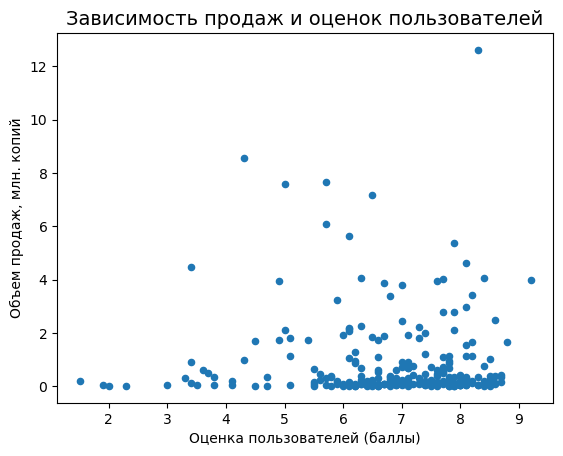

Коэффициент корреляции-0.0401


In [33]:
g = ps4.plot(x='user_score', y='total_sales', kind='scatter')
g.axes.set_title("Зависимость продаж и оценок пользователей", fontsize=14)
g.set_xlabel("Оценка пользователей (баллы)", fontsize=10)
g.set_ylabel("Объем продаж, млн. копий", fontsize=10)
plt.show()
print('Коэффициент корреляции{:.4f}'.format(ps4['user_score'].corr(ps4['total_sales'])))

С оценками пользователей ситуация иная: зависимость практически отсуствует, и много кассовых игр получили довольно низкие оценки пользователей (разброс начинается от 3 баллов, средняя оценка кассовых игр тяготеет к 6 баллам).

Интересна одна игра, набравшая почти максимальное количество баллов как у пользователей, так и у критиков, а также поставившая рекорд по продажам (12 млн. копий). Проверим финалиста.

In [34]:
ps4.query('total_sales > 12 & user_score > 8 & critic_score >90')['name']

42    Grand Theft Auto V
Name: name, dtype: object

Итак, игрой, которая нравится всем, является Grand Theft Auto V. Данная игра стоит особняком из многих игр, с большим отрывом побеждая конкурентов. Данная игра точно будет хорошо продаваться и в 2017 году.

Проверим, сохраняется ли по остальным платформам тенденция по очень умеренной зависимости оценок критиков и полной независимости оценок пользователей и итоговых продаж игры.

In [35]:
not_ps4=act_df.query('platform!="PS4"')

/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


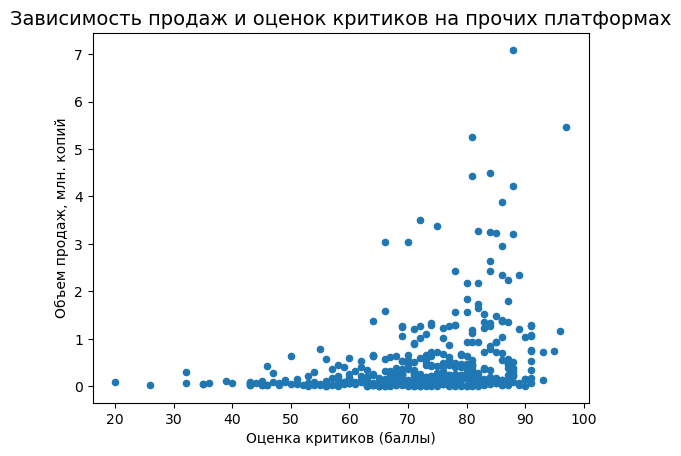

Коэффициент корреляции: 0.3095


In [36]:
g = not_ps4.plot(x='critic_score', y='total_sales', kind='scatter')
g.axes.set_title("Зависимость продаж и оценок критиков на прочих платформах", fontsize=14)
g.set_xlabel("Оценка критиков (баллы)", fontsize=10)
g.set_ylabel("Объем продаж, млн. копий", fontsize=10)
plt.show()
print('Коэффициент корреляции: {:.4f}'.format(not_ps4['critic_score'].corr(not_ps4['total_sales'])))

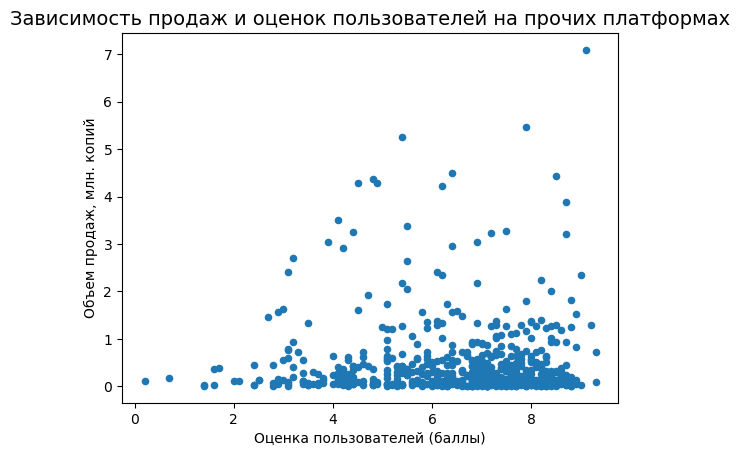

Коэффициент корреляции -0.0235


In [37]:
g = not_ps4.plot(x='user_score', y='total_sales', kind='scatter')
g.axes.set_title("Зависимость продаж и оценок пользователей на прочих платформах", fontsize=14)
g.set_xlabel("Оценка пользователей (баллы)", fontsize=10)
g.set_ylabel("Объем продаж, млн. копий", fontsize=10)
plt.show()
print('Коэффициент корреляции {:.4f}'.format(not_ps4['user_score'].corr(not_ps4['total_sales'])))

Рассмотрим отдельно 5 прочих платформ, проверим сохранение тенденции.

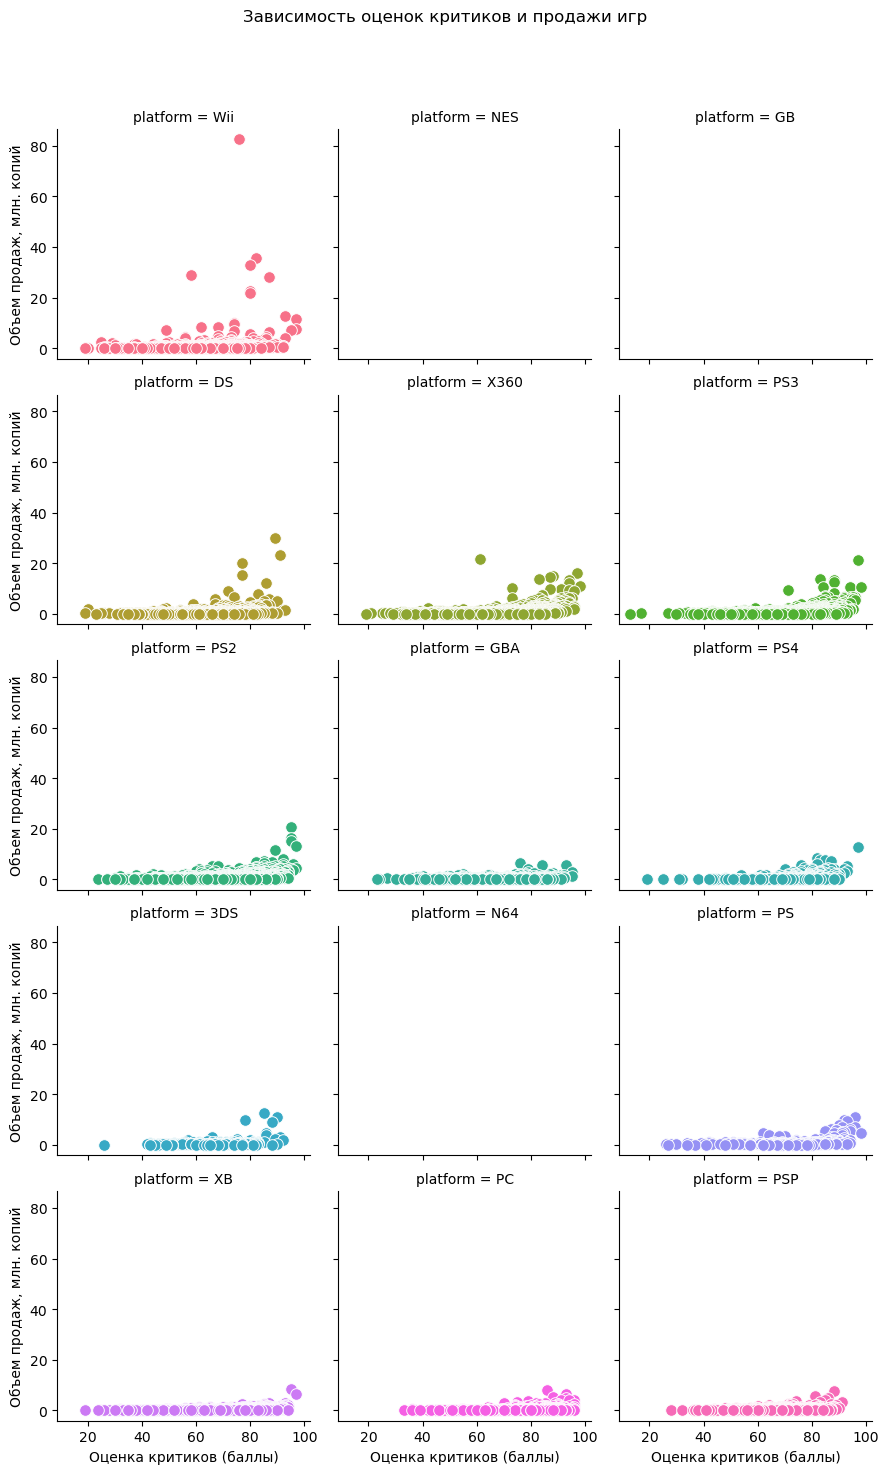

In [38]:
top = not_ps4.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()
top_not_ps4_df = df[df.platform.isin(top.index)]
g = sns.FacetGrid(top_df, col="platform", hue="platform", col_wrap=3)
g.map(sns.scatterplot, 'critic_score', 'total_sales', s=70)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Зависимость оценок критиков и продажи игр')
g.set_axis_labels("Оценка критиков (баллы)",
                  "Объем продаж, млн. копий");
plt.show()

In [39]:
for i in top_not_ps4_df['platform'].unique():
    print('Коэффициент корреляции по',i,'{:.4f}'.format(top_not_ps4_df[top_not_ps4_df['platform'] == i]['critic_score'].corr(
        top_not_ps4_df[top_not_ps4_df['platform'] == i]['total_sales'])))

Коэффициент корреляции по X360 0.3929
Коэффициент корреляции по PS3 0.4328
Коэффициент корреляции по 3DS 0.3487
Коэффициент корреляции по XOne 0.4170
Коэффициент корреляции по WiiU 0.3484


График распределения оценок и объема продаж игр по прочим платформам идентичен, отличие только в том, что на мобильных консолях (3DS и WiiU) ни одна из игр не подбиралась так близко к 100 баллам, как на прочих рассмотренных платформах и при этом, корреляция оценок и результата продаж еще ниже, чем с классическими консолями. Это может быть дополнительно связано и с более ограниченным выбором игр на мобильных консолях.

Сделаем аналогичный анализ для пользовательских оценок.

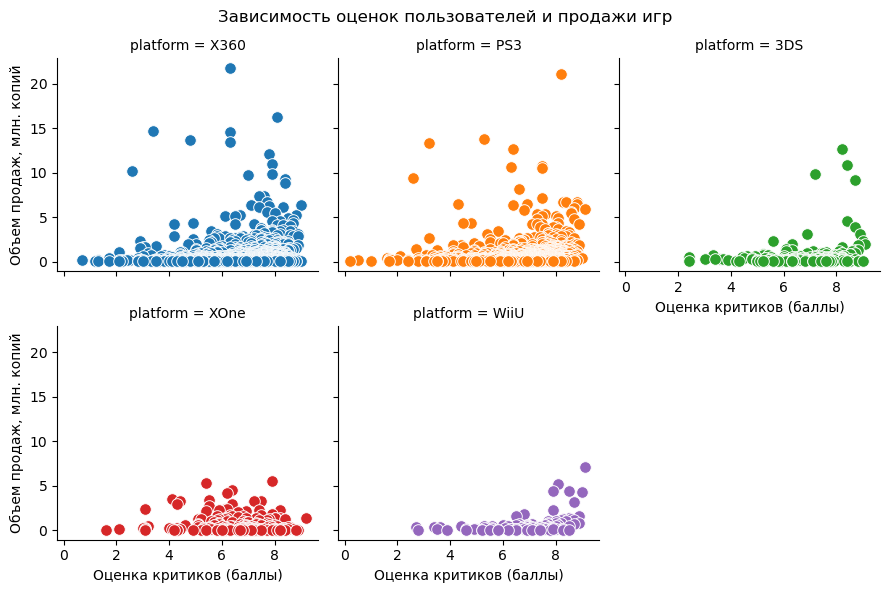

In [40]:
g = sns.FacetGrid(top_not_ps4_df, col="platform", hue="platform", col_wrap=3)
g.map(sns.scatterplot, 'user_score', 'total_sales', s=70)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Зависимость оценок пользователей и продажи игр')
g.set_axis_labels("Оценка критиков (баллы)",
                  "Объем продаж, млн. копий");
plt.show()

In [42]:
for i in top_not_ps4_df['platform'].unique():
    print('Коэффициент корреляции по',i,':',top_not_ps4_df[top_not_ps4_df['platform'] == i]['user_score'].corr(
        top_not_ps4_df[top_not_ps4_df['platform'] == i]['total_sales']))

Коэффициент корреляции по X360 : 0.11418661214018036
Коэффициент корреляции по PS3 : 0.12841562938563023
Коэффициент корреляции по 3DS : 0.22207843643390893
Коэффициент корреляции по XOne : -0.0689250532827942
Коэффициент корреляции по WiiU : 0.4002190202148619


Оценки пользователей еще более слабо влияют на продажи игр, исключение составляет только WiiU, где связь можно также охарактеризовать как слабую по шкале Чеддока, но все же более заметную, чем у прочих платформ.

Итого, подводя итог по влиянию оценок на продаваемость игры: оценка критиков и продажи коррелируют умеренно, чем выше оценка критиков, тем больше у игры шансов стать продаваемой (или наоборот), а вот пользователи тажке могут массово приобретать игру, которая в дальнейшем получает от них очень умеренные или низкие оценки. Исключение составляют мобильные платформы 3DS и WiiU, для которых оценка пользователей становится фактором успеха, который можно рассматривать в совокупности с мнениями критиков.

Отдельно каждый из показателей  не может являться надежным критерием кассовости продукта.

Проверим, какие жанры наиболее популярны

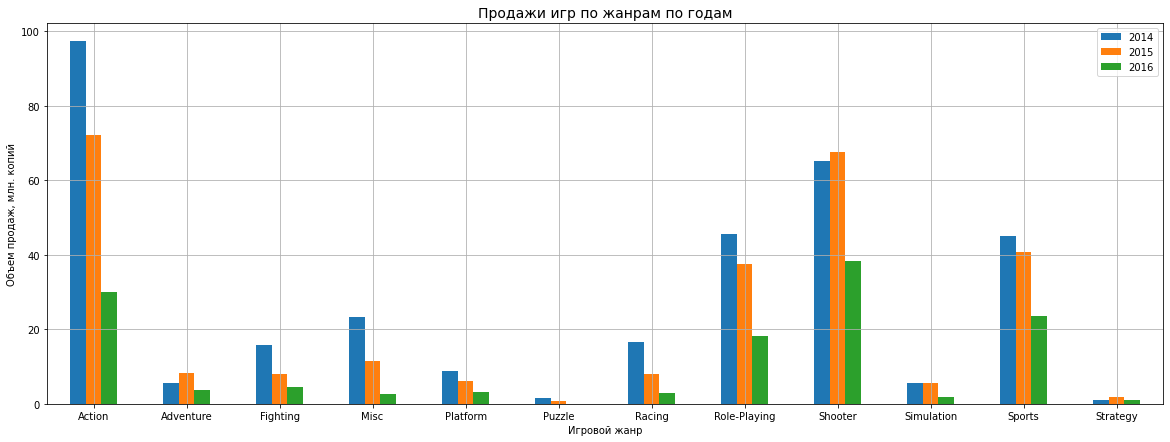

In [43]:
g = act_df.pivot_table(
    index = 'genre',
    columns = 'year_of_release',
    values = 'total_sales',
    aggfunc='sum').fillna(0).plot.bar(rot=0, grid=True,figsize = (20,7))
g.axes.set_title("Продажи игр по жанрам по годам", fontsize=14)
g.set_xlabel("Игровой жанр", fontsize=10)
g.set_ylabel("Объем продаж, млн. копий", fontsize=10)
plt.legend(["2014",'2015','2016'])
plt.show()

Тремя наиболее популярными жанрами являются Action, Shooter и Sports. Во всех трех четко выделяющийся нисходящий тренд, причем наиболее заметное падение в жанре Action - будучи лидером продаж до этого, он уступил первенство шутерам и спортивным симуляциям. Немного отстает от тройки лидеров Role-Playing, показатели данного жанра лишь немногим менее жанра Sports.

Наименее популярными жанрами на консолях и PC являются пазлы и стратегии, эти жанры являются стабильно аутсайдерами продаж.

Проверим жанры на предмет стабильности продаж для формирования наиболее надежного прогноза. Найдем медианные продажи по жанрам и сравним их между собой.

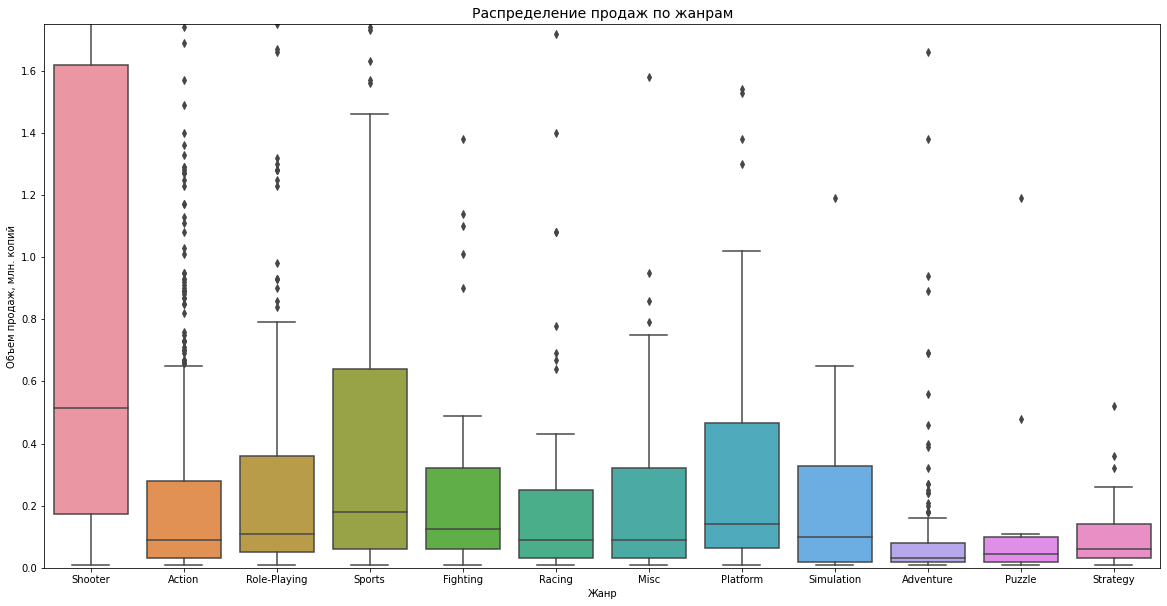

In [44]:
plt.figure(figsize=(20,10))
boxplot = sns.boxplot(data=act_df, x='genre', y='total_sales')
boxplot.set(ylim=(0, 1.75))
boxplot.axes.set_title("Распределение продаж по жанрам", fontsize=14)
boxplot.axes.set_ylabel("Объем продаж, млн. копий", fontsize=10)
boxplot.axes.set_xlabel("Жанр", fontsize=10)
plt.show()

Самые большие медианные продажи у Shooter, более того, несмотря на то, что Action в целом самый популярный класс игр, но объем продаж каждой отдельной игры в Shooter больше, чем в Action, где общая сумма продаж формируется за счет количества представленных игр, а также за счет "кассовых аномалий" - наиболее популярных игр. Аналогично Sport уступает пальму первенства по популярности Action, но в разрезе отдельных игр является более кассовым.

Итого промежуточный вывод:
- наиболее популярные платформы - PS4,XOne, 3DS, PS3;
- при этом медианные продажи игры по платформам PS4,X360,XOne,Wii и WiiU одинаковы, ок. 0.2 млн. копий, на прочих платформах это число ниже;
- наибольшее число "выдающихся" игр выпускается на PS4 и XOne;
- оценки критиков умеренно оказывают влияние на продаваемость игр, нельзя исключить и обратной зависимости (очень популярным играм априори ставят хорошие оценки);
- оценки пользователей не коррелируют с результатами продаж, за исключением мобильных консолей (3DS и WiiU), у которых зависимость сравнима с влиянием оценок критиков.
- наиболее популярны игры в жанрах Action, Shooter и Sports, при этом медианный объем продаж отдельной игры у "шутеров" в 3-4 раза выше, чем у прочих жанров. Также можно выделить продажи в жанре Sports, где медианная продажа игры в 2 раза выше оставшися жанров.

### Портрет пользователя

В датасете представлены 3 основных региона, формирующих большую часть выручки: Северная Америка, Евросоюз и Япония.
Попробуем обрисовать портрет пользователя данных регионов на основе предоставленных данных.

In [65]:
na_sales = act_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

x = na_sales[5:].sum()
na_sales.loc['Другие']= x
na_sales = na_sales.drop(labels=['PSP','Wii','WiiU','X360','XOne'], axis=0)

platform
PS4       98.61
3DS       22.64
PS3       22.05
PC         7.23
PSV        2.52
Другие    31.19
Name: na_sales, dtype: float64

In [46]:
eu_sales = act_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

x = eu_sales[5:].sum()
eu_sales.loc['Другие']= x
eu_sales = eu_sales.drop(labels=['X360','WiiU','WiiU','PSV','Wii','PSP'], axis=0)

In [47]:
jp_sales = act_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

x = jp_sales[5:].sum()
jp_sales.loc['Другие']= x
jp_sales = jp_sales.drop(labels=['PSP','XOne','X360','PC','Wii'], axis=0)

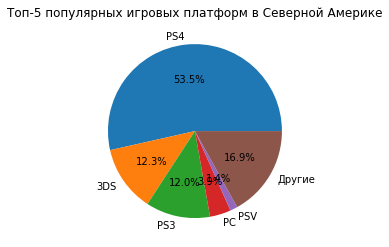

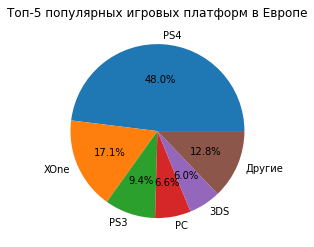

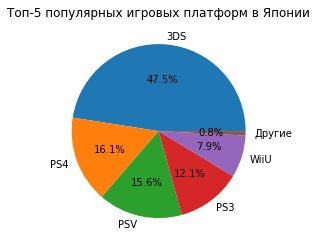

In [48]:
g = plt.pie(na_sales,labels=na_sales.index,autopct='%1.1f%%')
plt.title("Топ-5 популярных игровых платформ в Северной Америке")
plt.show()
g1 = plt.pie(eu_sales,labels=eu_sales.index,autopct='%1.1f%%')
plt.title("Топ-5 популярных игровых платформ в Европе")
plt.show()
g1 = plt.pie(jp_sales,labels=jp_sales.index,autopct='%1.1f%%')
plt.title("Топ-5 популярных игровых платформ в Японии")
plt.show()

Если рассматривать топ-5 популярных платформ в разрезе регионов, то можно сразу обратить внимание, что в Японии PS3 ненамного менее популярна, чем PS4, а Wii и X360 практически отсутствуют в составе выручки.

Следует отдельно отметить, что самой популярной платформой в Японии является 3DS от японской компании Nintendo, что серьезно отличает рынок Японии.
Европа и Северная Америка гораздо ближе по всем показателям, в т.ч. и по объему рынка, но в Америке X360 пользуется чуть большей популярностью (18% продаж против 8% в Европе)

In [80]:
def piv (values, name):
    g = act_df.pivot_table(
    index = 'genre',
    values =values,
    aggfunc='sum').plot(kind='pie',subplots=True,
                                  title = 'Продажи игр разных жанров в {}'.format(name), figsize=(6,5))
plt.show()

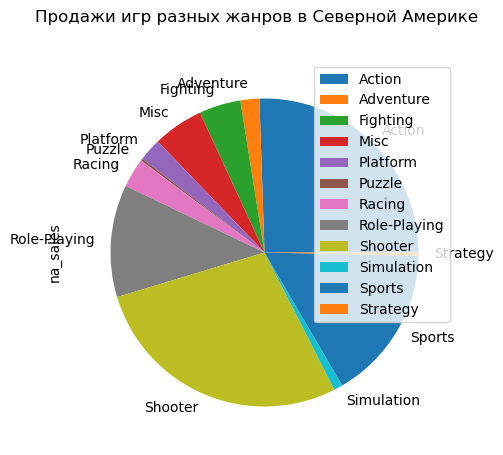

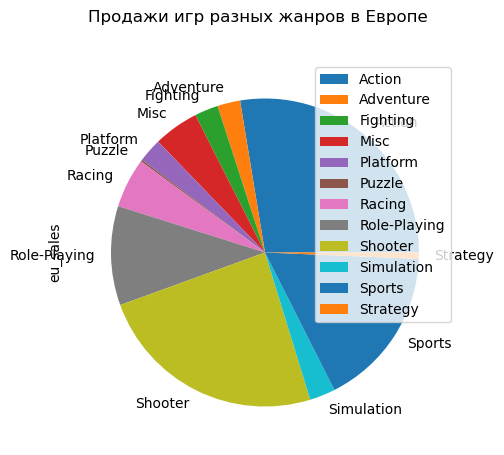

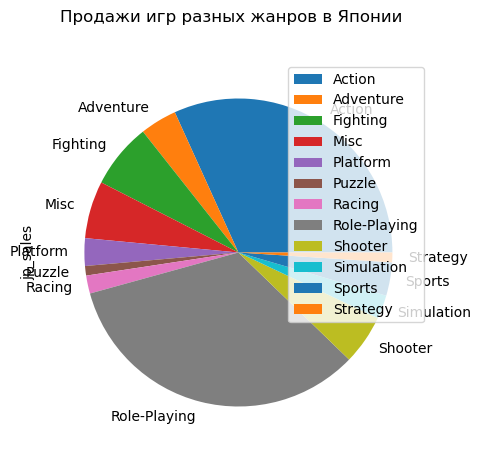

In [81]:
piv('na_sales', "Северной Америке")
piv('eu_sales', "Европе")
piv('jp_sales', "Японии")

Структура популярнейших жанров в Европе и Америке идентична, в топ-5 входят Action, Shooter, Sports, далее с большим отставанием Role-Playing и Misc.

В Японии структура иная: Action также наиболее популярный жанр, однако на 2 месте стоит Role-Playing, причем доля его ненамного уступает Action, затем  со значительным отставанием Shooter, Fighting и Sports. Таким образом, японцы предпочитают ролевые игры шутерам и спортивным симуляциям, однако все пользователи любят Action.

Проверим, влияет ли возрастной рейтинг на продажи по регионам.

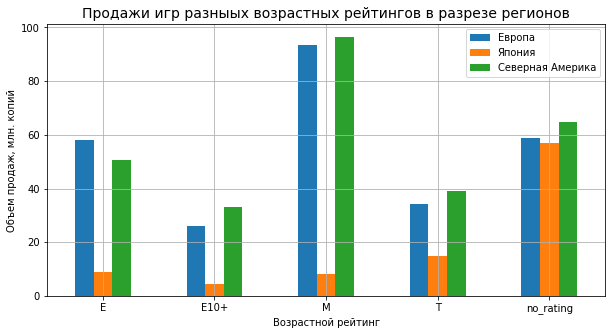

In [50]:
g = act_df.pivot_table(
    index = 'rating',
    values = ['na_sales','eu_sales','jp_sales'],
    aggfunc='sum').plot.bar(rot=0, grid=True,figsize = (10,5))
g.axes.set_title("Продажи игр разныых возрастных рейтингов в разрезе регионов", fontsize=14)
g.set_xlabel("Возрастной рейтинг", fontsize=10)
g.set_ylabel("Объем продаж, млн. копий", fontsize=10)
plt.legend(["Европа",'Япония','Северная Америка'])
plt.show()

Наиболее продаваемыми в Европе и Америке являются игры с рейтингом M - («Mature») — «Для взрослых», это игры, допустимые подросткам с 17 лет, с относительно небольшим количеством ограничений, в данных играх присутствуют и сцены насилия, ненормативная лексика и т.д. Вторым по популярности рейтингом в Европе и Северной Америке и самым пявляется E («Everyone») — «Для всех». Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера, третьим T(«Teen») — «Подросткам» (для лиц от 13 лет). Проекты из категории  'T' могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое. В Японии игры категории "Т" популярнее  категории "Е" (второе место по популярности), а категория "Е" занимает 3 место по популярности.

Но в Японии больше всего игр без маркировки возрастного рейтинга (как мы выявили ранее, скорее всего, они предназначены для внутреннего рынка), в Европе и Америке их не меньше,их количество сопоставимо с оличеством игр рейтинга "Е". В связи с чем о возрастном составе четкого вывода по Японии сделать не удастся, по Европе и Америке - с оговоркой.

<b>Таким образом, усредненный портрет пользователя Европы и Северной Америки: преимущественно взрослый, приобретающий игры для себя или для ребенка младшего возраста в жанре Action, Shooter, Sports, пользователь PS3, PS4 или X360.

<b>Аналогично, портрет пользователя из Японии: возрастной состав неясен, пользователь преимущественно 3DS, а также PS3, PS4, предпочитающий Action и Role-Playing.

## Проверка гипотез

### Гипотеза № 1 - Средние пользовательские рейтинги платформ Xbox One и PC

Проверим, отличается ли мнение пользователей об играх на не самых популярных на момент среза платформах: Xbox One и PC.

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные.

In [84]:
actual_df = act_df.dropna(subset=['user_score'])
actual_df['user_score'].isna().sum()
mass_1 = actual_df.query('platform == "XOne"')
mass_2 = actual_df.query('platform == "PC"')

In [85]:
alpha = 0.05
results = st.ttest_ind(mass_1['user_score'], mass_2['user_score'],equal_var = False)
print('Среднее медианное значение пользовательского рейтинга по XOne:',mass_1['user_score'].median())
print('Среднее медианное значение пользовательского рейтинга по PC:',mass_2['user_score'].median())
print('p-значение: {:.4f}'.format(results.pvalue))
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Среднее медианное значение пользовательского рейтинга по XOne: 6.8
Среднее медианное значение пользовательского рейтинга по PC: 6.8
p-значение: 0.1160
Не получилось отвергнуть нулевую гипотезу


Согласно данным t-теста, нулевая гипотеза, сформулированная как равенство средних рейтингов платформ, не может быть отвергнута. Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 32%, хотя рейтинги могут быть разными. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами. Таким образом, статистически значимой разницы между оценками пользователей Xbox One и PC и не выявлено.

### Гипотеза № 2 - Средние пользовательские рейтинги жанров Action и Sports

Проверим, отличается ли мнение пользователей о двух самых популярных (в Европе и Америке) жанрах.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [58]:
mass_3 = actual_df.query('genre == "Action"')
mass_4 = actual_df.query('genre == "Sports"')

In [59]:
alpha = 0.05
results = st.ttest_ind(mass_3['user_score'], mass_4['user_score'],equal_var = False)
print('Среднее медианное значение полльзовательского рейтинга по жанру Action:',mass_3['user_score'].median())
print('Среднее медианное значение полльзовательского рейтинга по жанру Sports:',mass_4['user_score'].median())
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Среднее медианное значение полльзовательского рейтинга по жанру Action: 7.1
Среднее медианное значение полльзовательского рейтинга по жанру Sports: 5.5
p-значение:  1.1825550382644557e-14
Отвергаем нулевую гипотезу


Согласно данным t-теста, нулевая гипотеза, сформулированная как равенство средних рейтингов жанров, не может быть принята. Значение p-value показывает: вероятность случайно получить такое или большее различие - менее 1%. Это значит, что пользователи оценивают данные жанры по-разному.

## Вывод

По итогам исследования необходимо отметить следующее:
- наиболее популярная платформа, на которую выходят и самые кассовые игры - PS4, вторая по популярности - XOne;
- в Японии наиболее популярная платформа 3DS;
- оценка критиков умеренно влияет на кассовость игр;
- оценка пользователей с кассовостью игр на стационарных платформах не коррелирует, видимо, основным фактором покупки в стаких случаях служат ожидание и реклама;
- оценка пользователей на платформах 3DS и Wii умеренно влияет на успешность продаж;
- наиболее популярный жанр - Action, также для Европы и Америки актуальны игры жанров Shooter и Sport, в Японии им предпочитают Role-Playing, при этом средний объем продаж жанра Shooter в 2-3 раза превосходит продажи по прочим жанрам.
- основными пользователями консолей в Европе и Америке являются предположительно, преимущественно взрослые, в Японии возрастной состав определить не удалось. Оговорка вызвана наличием значительного числа неразмеченных по возрастному рейтингу игр.

**Итого для Европы и Северной Америки следует обратить внимание на продвижение игр в жанре Action,Shooter и Sport, выходящие на PS4 и 3DS в Америке и на на PS4 и XOne в Европе.

**В Японии рекламный бюджет необходимо сконцентрировать на играх жанров Role-Playing и Action, выходящих на 3DS, PS4 и PS5.

**Целевая аудитория во всех случаях - взрослые и подростки** (как показывает практика киберсоревнований, в играх с рейтингом 17+ часто выигрывают дети 17-), с положительными (не менее 70 баллов) отзывами критиков. Для игр на платформе 3DS отдельно обратить внимание на игры, где отзывы пользователей также положительны (больше 6).
